In [15]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
#Load Dataset
df1=pd.read_csv('./EnergyUse-Heating.csv')
df1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [17]:
# Display key statistics
print(df1.describe())

               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8           Y  
count  768.000000  768.00000  768.000000  
mean     0.234375    2.81250   22.307201  
std      0.133221    1.55096   10.090196  
min      0.000000    0.00000    6.010000  
25%      0.100000    1.75000   12.992500  
50%      0.250000    

In [18]:
# Import required libraries
from collections import Counter

# Outlier detection
def detect_outliers(df, n, features):
    outlier_indices = []

    # Iterate over features (columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # Outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        # Append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # Select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers

# List of Outliers
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']  # All columns except the target column 'Y'
Outliers_to_drop = detect_outliers(df1, 0, features)
df1.loc[Outliers_to_drop]

# Drop outliers
df_cleaned = df1.drop(Outliers_to_drop).reset_index(drop=True)
print("\nDataFrame after removing outliers:")
print(df_cleaned.head())


DataFrame after removing outliers:
     X1     X2     X3      X4   X5  X6   X7  X8      Y
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84


In [19]:
# Create New Dataset without Outliers
good_data = df_cleaned.reset_index(drop=True)
print(good_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y       768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB
None


In [20]:
# Define x and y variables
X = good_data.drop('Y', axis=1).to_numpy()
y = good_data['Y'].to_numpy()

# Create Train and Test Datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

# Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [21]:
# Construct some pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_lm = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearRegression())])
pipeline.insert(0,pipe_lm)

pipe_lasso= Pipeline([('scl', StandardScaler()),
                     ('clf', Lasso(random_state=100))])
pipeline.insert(1,pipe_lasso)

pipe_ridge= Pipeline([('scl', StandardScaler()),
                     ('clf', Ridge(random_state=100))])
pipeline.insert(2,pipe_ridge)

pipe_elas= Pipeline([('scl', StandardScaler()),
                     ('clf', ElasticNet(random_state=100))])
pipeline.insert(3,pipe_elas)

# Set grid search params

modelpara =[]

param_gridlm = {}
modelpara.insert(0,param_gridlm)

param_gridlasso = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20],
                  'clf__tol':[1e-1, 1, 5, 10, 20, 50, 100]}
modelpara.insert(1,param_gridlasso)

param_gridridge = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20],
                  'clf__tol':[1e-1, 1, 5, 10, 20, 50, 100]}
modelpara.insert(2,param_gridridge)

param_gridelas = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20],
                 'clf__tol':[1e-1, 1, 5, 10, 20, 50, 100]}
modelpara.insert(3,param_gridelas)

Learning Curve - Linear Regression


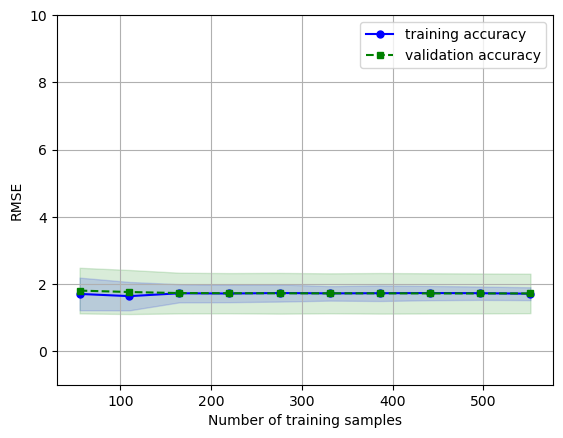

Learning Curve - Lasso


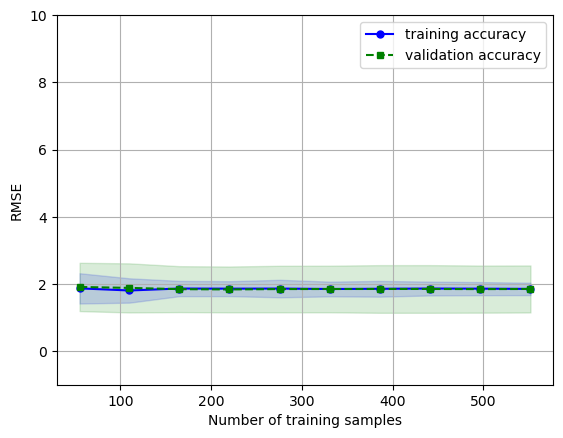

Learning Curve - Ridge


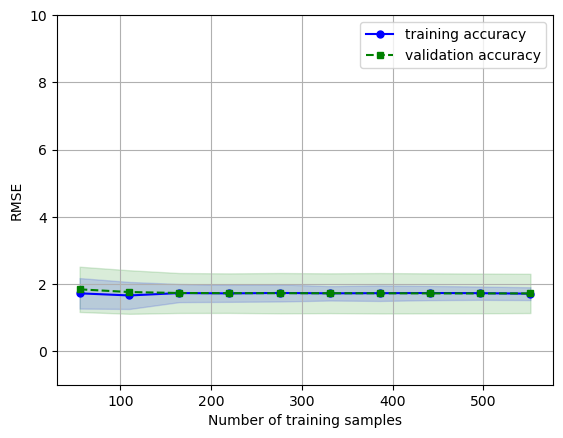

Learning Curve - ElasticNet


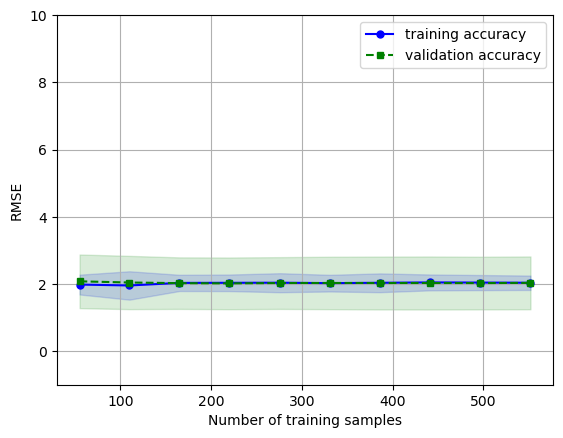

In [22]:
#Create Learning Curves

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=X_train,
                                                            y=y_train,
                                                            train_sizes=np.linspace(.1, 1, 10),
                                                            scoring='neg_root_mean_squared_error',
                                                            cv=10, random_state=100)

    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    train_std = np.sqrt(np.std(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))
    test_std = np.sqrt(np.std(-test_scores, axis=1))

    plt.plot(train_sizes, train_mean, color='blue', marker='o',
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('RMSE')
    plt.legend(loc='best')
    plt.ylim([-1, 10])
    plt.show()

# Plot Learning Curves
print('Learning Curve - Linear Regression')
plot_learning_curves(pipe_lm)
print('Learning Curve - Lasso')
plot_learning_curves(pipe_lasso)
print('Learning Curve - Ridge')
plot_learning_curves(pipe_ridge)
print('Learning Curve - ElasticNet')
plot_learning_curves(pipe_elas)

Model Evaluation - RMSE
LinearRegression 1.72
Lasso 1.85
Ridge 1.72
ElasticNet 2.03




C:\Users\PC\AppData\Local\Temp\ipykernel_20208\1144820226.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names)


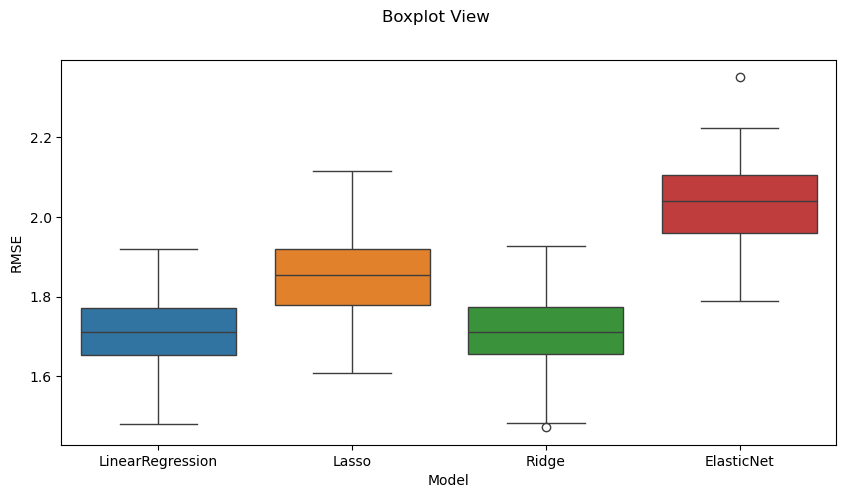

In [23]:
# Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models = []
models.append(('LinearRegression', pipe_lm))
models.append(('Lasso', pipe_lasso))
models.append(('Ridge', pipe_ridge))
models.append(('ElasticNet', pipe_elas))

# Model Evaluation
results = []
names = []
scoring = 'neg_root_mean_squared_error'
print('Model Evaluation - RMSE')
for name, model in models:
    rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model, X_train, y_train, cv=rkf, scoring=scoring)
    results.append(np.sqrt(-cv_results))
    names.append(name)
    print('{} {:.2f}'.format(name, np.sqrt(-cv_results.mean())))
print('\n')

# Boxplot View
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

def Gridsearch_cv(model, params):

    # Cross-validation Function
    cv2 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)

    # GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2, scoring='neg_root_mean_squared_error')
    gs_clf = gs_clf.fit(X_train, y_train)
    model = gs_clf.best_estimator_

    # Use best model and test data for final evaluation
    y_pred = model.predict(X_test)

    # Identify Best Parameters to Optimize the Model
    bestpara = str(gs_clf.best_params_)

    # Output Heading
    print('\nOptimized Model')
    print('\nModel Name:', str(model.named_steps['clf']))

    # Output Validation Statistics
    print('\nBest Parameters:', bestpara)

    # Test data accuracy of model with best params
    print('\nIntercept: {:.2f}'.format(float(gs_clf.best_estimator_.named_steps['clf'].intercept_)))
    print('\nModel coefficients: ')
    for name, score in zip(list(good_data.drop('Y', axis=1)),
                           gs_clf.best_estimator_.named_steps['clf'].coef_):
         print(name, round(score, 2))

    # Print R2
    print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, y_pred)))
    adjusted_r_squared2 = 1 - (1 - metrics.r2_score(y_test, y_pred)) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
    print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))

    # Print MSE and RMSE
    print('\nMean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
    print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
    print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

In [25]:
#Run Models
for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: LinearRegression()

Best Parameters: {}

Intercept: 22.31

Model coefficients: 
X1 -6.76
X2 -3.56
X3 0.7
X4 -3.81
X5 7.63
X6 0.02
X7 2.64
X8 0.34

R2: 0.91
Adj_R2: 0.91

Mean Absolute Error: 2.08
Mean Squared Error: 8.44
Root Mean Squared Error: 2.91

Optimized Model

Model Name: Lasso(alpha=0.1, random_state=100, tol=0.1)

Best Parameters: {'clf__alpha': 0.1, 'clf__tol': 0.1}

Intercept: 22.31

Model coefficients: 
X1 -0.25
X2 -2.56
X3 3.39
X4 -1.14
X5 4.83
X6 0.0
X7 2.59
X8 0.27

R2: 0.90
Adj_R2: 0.90

Mean Absolute Error: 2.18
Mean Squared Error: 9.51
Root Mean Squared Error: 3.08


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.0997e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.02916e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.09741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.06861e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning


Optimized Model

Model Name: Ridge(alpha=0.1, random_state=100, tol=0.1)

Best Parameters: {'clf__alpha': 0.1, 'clf__tol': 0.1}

Intercept: 22.31

Model coefficients: 
X1 -6.61
X2 -3.45
X3 0.73
X4 -3.72
X5 7.67
X6 0.02
X7 2.64
X8 0.34

R2: 0.91
Adj_R2: 0.91

Mean Absolute Error: 2.08
Mean Squared Error: 8.44
Root Mean Squared Error: 2.91

Optimized Model

Model Name: ElasticNet(alpha=1e-15, random_state=100, tol=0.1)

Best Parameters: {'clf__alpha': 1e-15, 'clf__tol': 0.1}

Intercept: 22.31

Model coefficients: 
X1 -0.01
X2 -2.78
X3 3.68
X4 -0.7
X5 4.89
X6 0.02
X7 2.67
X8 0.35

R2: 0.90
Adj_R2: 0.90

Mean Absolute Error: 2.25
Mean Squared Error: 9.65
Root Mean Squared Error: 3.11
